# Linear Regression

In this notebook, we will implement Linear Regression in two ways: using the closed-form solution and gradient descent. We will use two CSV files, `train.csv` and `test.csv`, each containing columns `x` and `y`. The steps are as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and Plot Data

First, we load the `train.csv` and `test.csv` files. We extract the feature `x` and the target `y`, and plot the data points using `plt.scatter`. We use different colors for the training and testing points.

In [2]:
# Load the train.csv and test.csv files
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

Just some information about the data

In [3]:
print(train.head())
print(train.shape)
print(test.shape)

# Extract the feature x and the target y
x_train, y_train = train['x'], train['y']
x_test, y_test = test['x'], test['y']

train_set_size = len(x_train)
test_set_size = len(x_test)

x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

print(x.shape)
print(y.shape)

          x         y
0  3.246231 -8.817926
1  1.437186 -3.021341
2 -0.221106 -0.733336
3 -0.698492 -4.851528
4 -0.120603 -0.558373
(140, 2)
(60, 2)
(200,)
(200,)


Plotting the data points (xi, yi) using plt.scatter. 

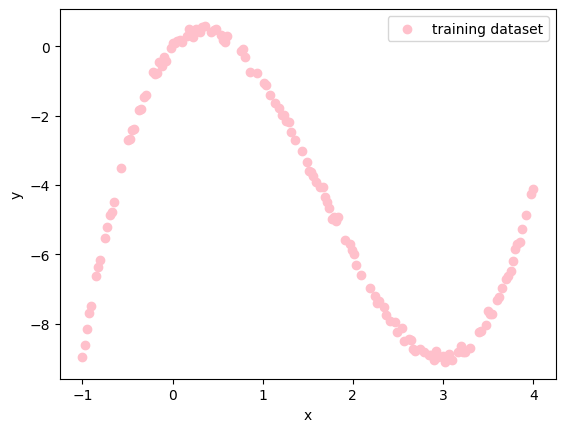

In [4]:


dataset = plt.scatter(x=x_train, y=y_train, color='pink')
plt.xlabel('x')
plt.ylabel('y')
plt.legend([dataset], ['training dataset'])
plt.show()


Plotting the training points in one color, and the testing points in another color.

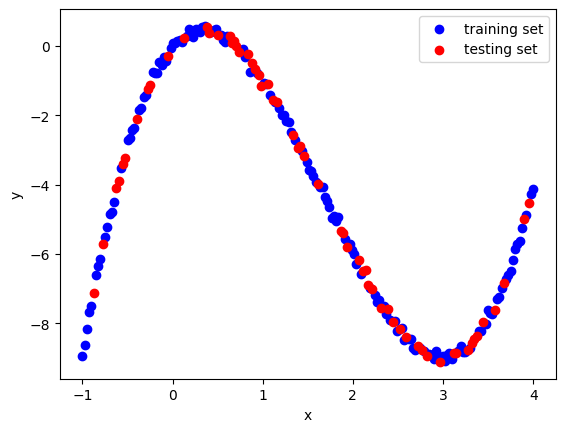

In [5]:
train_set = plt.scatter(x=x_train, y=y_train, color='blue')
test_set = plt.scatter(x=x_test, y=y_test, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend([train_set, test_set], ['training set', 'testing set'])
plt.show()

### Let's try a Linear Regression model and see how it fits the data

Construct the matrix X, and the target y, from the training set

In [6]:
X = np.ones((train_set_size, 1), np.int8)
X = np.append(X, np.array(x_train).reshape(train_set_size, 1), axis=1)
print(X.shape)

Y = np.array(y_train).reshape(train_set_size, 1)
print(Y.shape)

theta = np.zeros((2, 1))

(140, 2)
(140, 1)


#### Closed Form Solution 

We assume a linear model of the form $y = \theta_0 + \theta_1 x$. Using the closed-form solution, we find the optimal values of $\theta_0$ and $\theta_1$.
- Construct the matrix \( X \) and the target vector \( y \) from the training set.
- Solve for $\theta$ using the formula $ \theta = (X^TX)^{-1}X^Ty $.
- Calculate the Mean Squared Error (MSE) on the training and testing sets.

In [7]:
def closed_form_solution(X, Y):
    return np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), Y))

Optimal $\theta$* obtained from the closed form solution

In [8]:
theta_optimal_cf = closed_form_solution(X, Y)
theta_optimal_cf

array([[-2.44613798],
       [-1.36188699]])

In [9]:
# Calculate Mean Squared Error (MSE)
def compute_mse(theta, x, y):
    n = len(x)
    pred = x.dot(theta)
    sqaured_errors = np.sum((pred - y)**2)
    return sqaured_errors/n


Computed MSE on training and testing data

In [10]:
# Values of theta
print(f"Theta_0: {theta_optimal_cf[0]}")
print(f"Theta_1: {theta_optimal_cf[1]}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_cf, X, Y)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_cf, X_test, Y_test)}')

Theta_0: [-2.44613798]
Theta_1: [-1.36188699]
MSE (Train): 6.962045264556655
MSE (Test): 5.86114006204812


#### Gradient Descent

1. Initialize $\theta_0, \theta_1$
2. Iteratively update the parameters using the gradient descent update rule.
3. Continue until convergence.
4. Calculate the MSE on the training and testing sets.

In [11]:
def compute_gradient(X, Y, theta):
    X_transpose = X.transpose()
    prev_temp = np.matmul(X, theta)
    temp = prev_temp - Y
    ans = np.matmul(X_transpose, temp)
    return 2 * ans
    

Function that performs Gradient Descent and terminated when a certain loss threshold is met.

In [12]:
def gradient_descent(X, Y, eta, theta_dims, iterations = 30):
    # Randomly initialize values for theta
    theta = np.array(np.random.rand(theta_dims, 1))

    loss_threshold = 5

    for i in range(1, iterations + 1):
        theta = np.subtract(theta, eta * compute_gradient(X, Y, theta))
        loss = compute_mse(theta, X, Y)
        print(f'Iteration {i}: Loss: {loss}')

        if loss < loss_threshold:
            print('Threshold reached. Terminating gradient descent!')
            break

    return theta

Optimal $\theta$* obtained by performing Gradient Descent

In [13]:
theta_optimal_gd = gradient_descent(X, Y, 0.0005, 2)

Iteration 1: Loss: 12.691012602986302
Iteration 2: Loss: 9.220620486869043
Iteration 3: Loss: 8.68776909121236
Iteration 4: Loss: 8.453552628553725
Iteration 5: Loss: 8.269594687397012
Iteration 6: Loss: 8.110069720372358
Iteration 7: Loss: 7.9701696544729215
Iteration 8: Loss: 7.847333124114698
Iteration 9: Loss: 7.739465210245986
Iteration 10: Loss: 7.644740594495488
Iteration 11: Loss: 7.561557697346864
Iteration 12: Loss: 7.488510207375294
Iteration 13: Loss: 7.424363176446842
Iteration 14: Loss: 7.368032129541989
Iteration 15: Loss: 7.318564729413963
Iteration 16: Loss: 7.275124676194192
Iteration 17: Loss: 7.236977568829407
Iteration 18: Loss: 7.203478489237161
Iteration 19: Loss: 7.174061099268459
Iteration 20: Loss: 7.148228066149217
Iteration 21: Loss: 7.125542654532149
Iteration 22: Loss: 7.105621343013658
Iteration 23: Loss: 7.088127340289982
Iteration 24: Loss: 7.072764891336161
Iteration 25: Loss: 7.0592742773476695
Iteration 26: Loss: 7.047427424913294
Iteration 27: Loss:

In [14]:
print(f"Optimal theta values: \n{theta_optimal_gd}")

Optimal theta values: 
[[-2.13112884]
 [-1.47928102]]


Computed MSE on training and testing data

In [15]:
# Values of theta
print(f"Theta_0: {theta_optimal_gd[0]}")
print(f"Theta_1: {theta_optimal_gd[1]}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_gd, X, Y)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_gd, X_test, Y_test)}')

Theta_0: [-2.13112884]
Theta_1: [-1.47928102]
MSE (Train): 7.012820528691969
MSE (Test): 5.692085754686752


### Analysis

1. Plotting the linear models trained using closed form and gradient descent

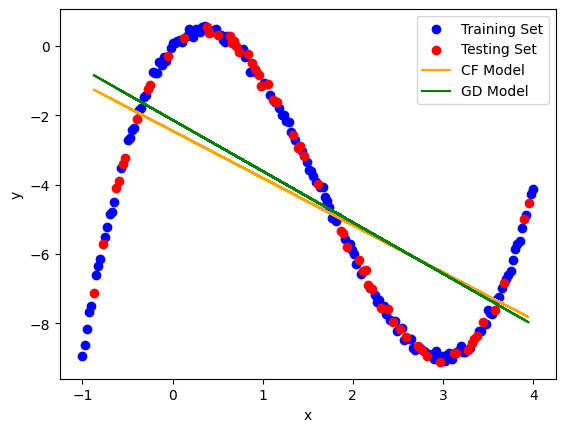

In [16]:
# Plot the training points in one color, and plot the testing points in another color.
train_set = plt.scatter(x=x_train, y=y_train, color='blue', label='Training Set')
test_set = plt.scatter(x=x_test, y=y_test, color='red', label='Testing Set')
y_pred = theta_optimal_cf[1]*x_test + theta_optimal_cf[0]
cf_model = plt.plot(x_test, y_pred, color='orange', label='CF Model')
y_pred = theta_optimal_gd[1] * x_test + theta_optimal_gd[0]
gd_model = plt.plot(x_test, y_pred, color = 'green', label='GD Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We can see that the gradient descent model is almost very similar to the closed form model. Another observation is that both the models don't fit the dataset well.

2. Parameter Comparison: 
    Let's compare the $\theta$* values obtained by closed form and gradient descent by computing their relative difference.


In [17]:
diff = abs(theta_optimal_cf - theta_optimal_gd)
diff

array([[0.31500914],
       [0.11739403]])

We can see that there is a very slight different in weights (<0.3) obtained by training two different methods. This difference is likely because closed form gives us the best weights possible for our dataset and loss function, whereas, gradient descent iteratively tries to converge at the global minimum. Many times gradient descent might not converge at the most optimal solution due to reduced number of iterations or slightly higher learning rate. But the solution obtained through gradient descent is asymptotically faster and almost as good as the closed form solution.

3. Error Comparison: Let's compare the MSE values from both the solutions on the training and test set

In [18]:
print(f'Diff in MSE (Train): {abs(compute_mse(theta_optimal_gd, X, Y) - compute_mse(theta_optimal_cf, X, Y))}')
print(f'Diff in MSE (Test): {abs(compute_mse(theta_optimal_gd, X_test, Y_test) - compute_mse(theta_optimal_cf, X_test, Y_test))}')

Diff in MSE (Train): 0.0507752641353143
Diff in MSE (Test): 0.1690543073613684


We can see that the difference in MSE values obtained from both the techniques in the training and test set in very less. This mean gradient descent has almost convereged at the global minimum and the algorithm has worked well.

## Let's try a Quadratic Model

We now assume a quadratic model of the form $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [19]:
X_train = np.ones((train_set_size, 1), np.int8)
X_train = np.append(X_train, np.array(x_train).reshape(train_set_size, 1), axis = 1)
X_train = np.append(X_train, np.array(x_train**2).reshape(train_set_size, 1), axis = 1)
print(X_train.shape)

Y_train = np.array(y_train).reshape(train_set_size, 1)
print(Y_train.shape)


(140, 3)
(140, 1)


### Closed form solution

- Construct the matrix ( $X$ ) and the target vector ( $y$ ) from the training set.
- Solve for $\theta$ using the closed-form solution.
- Calculate the MSE on the training and testing sets.

In [20]:
theta_optimal_cf = closed_form_solution(X_train, Y_train)
theta_optimal_cf

array([[-2.44555099],
       [ 0.1287079 ],
       [-0.49909581]])

Computed MSE on training and testing set

In [21]:
# Values of theta
print(f"Optml Theta: \n{theta_optimal_cf}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_cf, X_train, Y_train)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**2).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_cf, X_test, Y_test)}')

Optml Theta: 
[[-2.44555099]
 [ 0.1287079 ]
 [-0.49909581]]
MSE (Train): 6.045657725729195
MSE (Test): 5.014831924751814


### Gradient Descent

- Initialize $\theta_0, \theta_1, and \theta_2 $
- Iteratively update the parameters using the gradient descent update rule.
- Continue until convergence.
- Calculate the MSE on the training and testing sets.

In [22]:
theta_optimal_gd = gradient_descent(X_train, Y_train, 0.00012, 3, 50)

Iteration 1: Loss: 22.795968284461676
Iteration 2: Loss: 14.611046592885405
Iteration 3: Loss: 11.575419530133887
Iteration 4: Loss: 10.39342481948834
Iteration 5: Loss: 9.880871424911327
Iteration 6: Loss: 9.612174361565794
Iteration 7: Loss: 9.434302668162621
Iteration 8: Loss: 9.292152440777853
Iteration 9: Loss: 9.165807384555686
Iteration 10: Loss: 9.0479978583082
Iteration 11: Loss: 8.936002274856008
Iteration 12: Loss: 8.828737298229752
Iteration 13: Loss: 8.725712257040383
Iteration 14: Loss: 8.626653332136737
Iteration 15: Loss: 8.531368384154604
Iteration 16: Loss: 8.439698243084445
Iteration 17: Loss: 8.351499067238269
Iteration 18: Loss: 8.266635870163146
Iteration 19: Loss: 8.18498006517723
Iteration 20: Loss: 8.106408458385289
Iteration 21: Loss: 8.030802766946396
Iteration 22: Loss: 7.958049330712015
Iteration 23: Loss: 7.888038897816052
Iteration 24: Loss: 7.820666441138636
Iteration 25: Loss: 7.755830989999192
Iteration 26: Loss: 7.693435471297341
Iteration 27: Loss: 7

In [23]:
print(f"Optimal theta values: \n{theta_optimal_gd}")

Optimal theta values: 
[[-1.28880202]
 [-0.10275319]
 [-0.54850681]]


Computed MSE on training and testing set

In [24]:
# Values of theta
print(f"Optml Theta: \n{theta_optimal_gd}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_gd, X_train, Y_train)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**2).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_gd, X_test, Y_test)}')

Optml Theta: 
[[-1.28880202]
 [-0.10275319]
 [-0.54850681]]
MSE (Train): 6.7310424668018705
MSE (Test): 5.177285059620101


### Analysis

1. Plotting the quadratic models trained using gradient descent and closed form

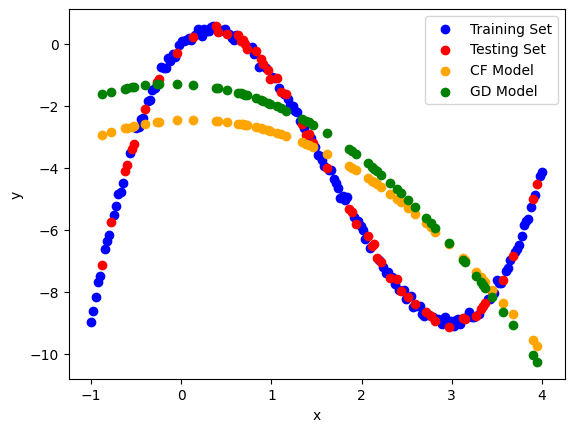

In [25]:
# Plot the training points in one color, and plot the testing points in another color.
train_set = plt.scatter(x=x_train, y=y_train, color='blue', label='Training Set')
test_set = plt.scatter(x=x_test, y=y_test, color='red', label='Testing Set')
y_pred = X_test @ theta_optimal_cf
cf_model = plt.scatter(x_test, y_pred, color='orange', label='CF Model')


y_pred = X_test @ theta_optimal_gd
gd_model = plt.scatter(x_test, y_pred, color = 'green', label='GD Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In the above graph we can see that the gradient descent model is pretty close to the closed form model, and therefore, we should be expecting just a small difference in the weights and MSE values between both the models. However, we can also notice that both the models don't fit very well to the dataset

2. Parameter Comparison: 
    Let's compare the $\theta$* values obtained by closed form and gradient descent by computing their relative difference.


In [26]:
diff = abs(theta_optimal_cf - theta_optimal_gd)
diff

array([[1.15674897],
       [0.23146109],
       [0.049411  ]])

We can see that $\theta_0$ value is slightly more, as from the plot we can see that both the models though somewhat similar, there are some larger differences than the linear models. The difference is because gradient descent hasn't converged fully which is probably due to lower iterations and or a slightly higher learning rate. But overall, the gradient descent model performance is comparable to the closed form model.

3. Error Comparison: Let's compare the MSE values from both the solutions on the training and test set

In [27]:
print(f'Diff in MSE (Train): {abs(compute_mse(theta_optimal_gd, X_train, Y_train) - compute_mse(theta_optimal_cf, X_train, Y_train))}')
print(f'Diff in MSE (Test): {abs(compute_mse(theta_optimal_gd, X_test, Y_test) - compute_mse(theta_optimal_cf, X_test, Y_test))}')

Diff in MSE (Train): 0.6853847410726752
Diff in MSE (Test): 0.16245313486828739


We can see that the difference in MSE values obtained from both the techniques in the training and test set in very less. This means gradient descent has converged close to the global minimum.

## Let's try a cubic model

We now assume a cubic model of the form $y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$

In [28]:
X_train = np.ones((train_set_size, 1), np.int8)
X_train = np.append(X_train, np.array(x_train).reshape(train_set_size, 1), axis = 1)
X_train = np.append(X_train, np.array(x_train**2).reshape(train_set_size, 1), axis = 1)
X_train = np.append(X_train, np.array(x_train**3).reshape(train_set_size, 1), axis=1)
print(X_train.shape)

Y_train = np.array(y_train).reshape(train_set_size, 1)
print(Y_train.shape)


(140, 4)
(140, 1)


### Closed form solution

- Construct the matrix $ X $ and the target vector $ y $ from the training set.
- Solve for $\theta$ using the closed-form solution.
- Calculate the MSE on the training and testing sets.

In [29]:
theta_optimal_cf = closed_form_solution(X_train, Y_train)
theta_optimal_cf

array([[-0.01809716],
       [ 2.98461213],
       [-4.97818731],
       [ 0.99539667]])

Computed MSE on training and testing set

In [30]:
# Values of theta
print(f"Optml Theta: \n{theta_optimal_cf}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_cf, X_train, Y_train)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**2).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**3).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_cf, X_test, Y_test)}')

Optml Theta: 
[[-0.01809716]
 [ 2.98461213]
 [-4.97818731]
 [ 0.99539667]]
MSE (Train): 0.008813265546338012
MSE (Test): 0.007977113216290624


### Gradient Descent

- Initialize $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$
- Iteratively update the parameters using the gradient descent update rule.
- Continue until convergence.
- Calculate the MSE on the training and testing sets.

In [31]:
theta_optimal_gd = gradient_descent(X_train, Y_train, 0.0000110, 4, 250)

Iteration 1: Loss: 106.83978201043763
Iteration 2: Loss: 62.09182957763026
Iteration 3: Loss: 40.484354101826476
Iteration 4: Loss: 29.996288371392918
Iteration 5: Loss: 24.851951254822442
Iteration 6: Loss: 22.276332214711342
Iteration 7: Loss: 20.936128960854738
Iteration 8: Loss: 20.19072535158943
Iteration 9: Loss: 19.73231476995938
Iteration 10: Loss: 19.412993095371895
Iteration 11: Loss: 19.161683452583883
Iteration 12: Loss: 18.94422171203781
Iteration 13: Loss: 18.744179089180133
Iteration 14: Loss: 18.553648130916287
Iteration 15: Loss: 18.368815730549652
Iteration 16: Loss: 18.18783612780843
Iteration 17: Loss: 18.0098089642286
Iteration 18: Loss: 17.83428827561829
Iteration 19: Loss: 17.661046579614645
Iteration 20: Loss: 17.489961526751838
Iteration 21: Loss: 17.320961438657257
Iteration 22: Loss: 17.153999139296193
Iteration 23: Loss: 16.989039379973377
Iteration 24: Loss: 16.826052795640685
Iteration 25: Loss: 16.66501299927191
Iteration 26: Loss: 16.505895183982002
Iter

In [32]:
print(f"Optimal theta values: \n{theta_optimal_gd}")

Optimal theta values: 
[[-0.8036414 ]
 [-0.08205875]
 [-1.14239634]
 [ 0.17144809]]


Computed MSE on training and testing set

In [33]:
# Values of theta
print(f"Optml Theta: \n{theta_optimal_gd}")

# MSE on training set
print(f'MSE (Train): {compute_mse(theta_optimal_gd, X_train, Y_train)}')

# MSE on test set
X_test = np.ones((test_set_size, 1), np.int8)
X_test = np.append(X_test, np.array(x_test).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**2).reshape(test_set_size, 1), axis=1)
X_test = np.append(X_test, np.array(x_test**3).reshape(test_set_size, 1), axis=1)
Y_test = np.array(y_test).reshape(test_set_size, 1)
print(f'MSE (Test): {compute_mse(theta_optimal_gd, X_test, Y_test)}')

Optml Theta: 
[[-0.8036414 ]
 [-0.08205875]
 [-1.14239634]
 [ 0.17144809]]
MSE (Train): 4.998294138810881
MSE (Test): 3.8245631981575925


### Analysis

1. Plotting the cubic models trained using closed form and gradient descent

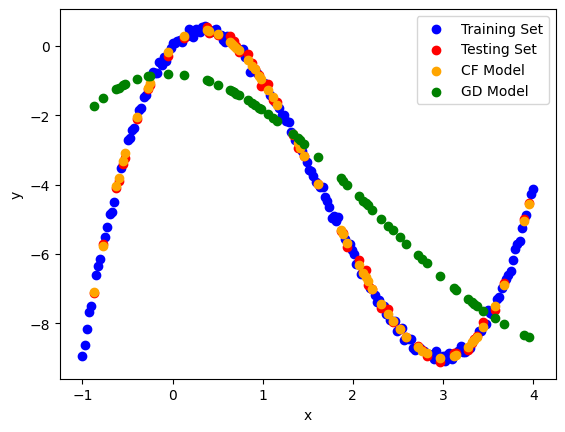

In [34]:
# Plot the training points in one color, and plot the testing points in another color.
train_set = plt.scatter(x=x_train, y=y_train, color='blue', label='Training Set')
test_set = plt.scatter(x=x_test, y=y_test, color='red', label='Testing Set')
y_pred = X_test @ theta_optimal_cf
cf_model = plt.scatter(x_test, y_pred, color='orange', label='CF Model')


y_pred = X_test @ theta_optimal_gd
gd_model = plt.scatter(x_test, y_pred, color = 'green', label='GD Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initially, the gradient descent model was only trained on 100 iterations and the model didn't seem to converge well on the data. Then, on increasing the iterations to 250, the gradient descent model seems to fit the data better (though not the best). Therefore, we can see that the gradient descent model is able to identify the cubic curve in the data but either needs more iterations to converge and match the closed form model or probably try a slightly higher learning rate. But, we should be expecting a noticable difference in the loss in the furter steps.

2. Parameter Comparison: 
    Let's compare the $\theta$* values obtained by closed form and gradient descent by computing their relative difference.


In [35]:
diff = abs(theta_optimal_cf - theta_optimal_gd)
diff

array([[0.78554424],
       [3.06667088],
       [3.83579098],
       [0.82394857]])

As mentioned above, we can see that there is some comparable difference in the weights obtained as the gradient descent model has not converged fully. Increasing the number of iterations and slightly increasing the learning rate should do the deed!

3. Error Comparison: Let's compare the MSE values from both the solutions on the training and test set

In [36]:
print(f'Diff in MSE (Train): {abs(compute_mse(theta_optimal_gd, X_train, Y_train) - compute_mse(theta_optimal_cf, X_train, Y_train))}')
print(f'Diff in MSE (Test): {abs(compute_mse(theta_optimal_gd, X_test, Y_test) - compute_mse(theta_optimal_cf, X_test, Y_test))}')

Diff in MSE (Train): 4.989480873264543
Diff in MSE (Test): 3.816586084941302


We can see that the difference in MSE values obtained from both the techniques in the training and test set in a little more. This is because the gradient descent model has not fully converged at the global minimum and hence the difference in loss. We can see that among all three Regression models, the cubic models seems to fit the data the best. 